# An experiment to compare PCA and Isomap
## *The code is adapted from an exericise in Microsoft data science course DAT210x*

This experiment is to replicate a result from this [paper](http://web.mit.edu/cocosci/Papers/sci_reprint.pdf). There are lots of details as well as examples in the paper. For my education, I just wanted to redo one of the examples to understand how Isomap works and how it differentiates from another popular dimention-reduction technique, PCA.

The paper proposes a method to reduce the dimensions of datasets whose exibit nonlinear relalionships between features (columns). For instance, in a dataset used in this paper, the facedata, each column represent gray-scale values of images of a face at different angles and lighting directions. One can think of nonlinear relationships between different columns result from a rotation of the angle or lighting from left to right or from down to up poses. Rotation is a nonlinear transformation and Isomap technique aims to capture this effect. Moreover, Isomap are outperform PCA in this regard due to PCA assumes linear relationships between features.

Let's see the differences!


In [34]:
# import dependencies
import pandas as pd
import numpy as np
import scipy.io
import random, math
from sklearn import manifold
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [35]:
# A bit of setting up for visualization 2D and 3D

def Plot2D(T, title, x, y, num_to_plot=40):
  # This method picks a bunch of random images to plot onto the chart:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title(title)
  ax.set_xlabel('Component: {0}'.format(x))
  ax.set_ylabel('Component: {0}'.format(y))
  x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
  y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
  for i in range(num_to_plot):
    img_num = int(random.random() * num_images)
    x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
    x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
    img = df.iloc[img_num,:].reshape(num_pixels, num_pixels)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))
  ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [36]:
# A bit of data i/o 

mat = scipy.io.loadmat('face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))

# Rotate the images for straight facial visual
for i in range(num_images):
  df.loc[i,:] = df.loc[i,:].reshape(num_pixels, num_pixels).T.reshape(-1)

num_images, num_pixels


(698, 64)

Now, this data set has 4096 columns. We want to reduce the dimension to only 3 for the purpose of visualization and somehow reserve as much information as we can. Let's try with PCA.

In [37]:
pca = PCA(n_components=3)
pca.fit(df)
PCA(copy=True, n_components=3, whiten=False)
df_PCA = pca.transform(df)

Ok. We have applied PCA to our dataframe and produce data set df_PCA. Let's pick any 2 dimensions and plot quick graphs to see if there is any pattern. 

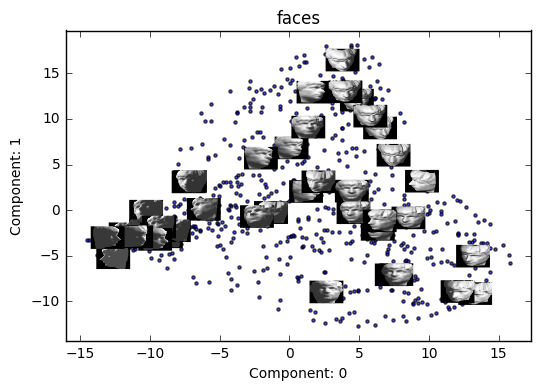

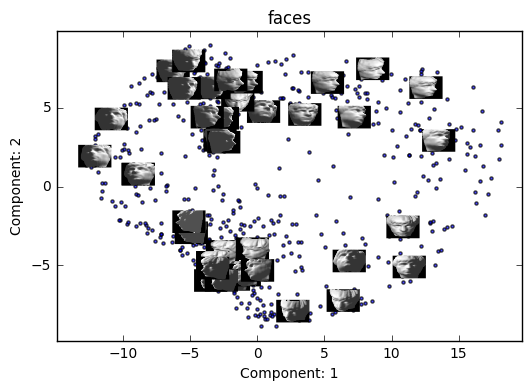

In [38]:
%matplotlib inline
Plot2D(df_PCA, 'faces', 0, 1, num_to_plot=40)
Plot2D(df_PCA, 'faces', 1, 2, num_to_plot=40)

Well, they are pretty random and we can really tell what kind of "degree of freedom" each axis represent. Now, we know that there are at lease 2 nonlinear feature exists in the original data set: the face is rotating and the lighting is rotating, too. Let's see whether these properties can be captured by Isomap. Again, we want to reduce the dimension to 3 (using Isomap)

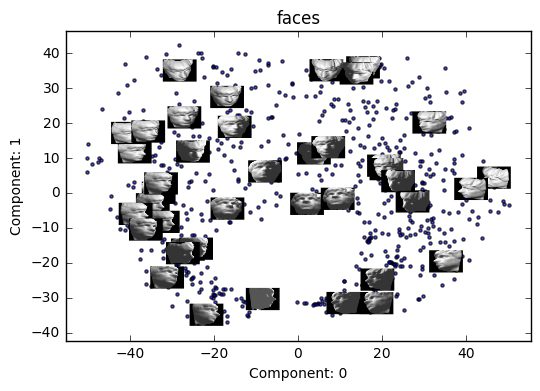

In [39]:
iso = manifold.Isomap(eigen_solver='auto', max_iter=None, n_components=3, n_neighbors=10,
    neighbors_algorithm='auto', path_method='auto', tol=0)
iso.fit(df)
manifold = iso.transform(df)
# Plot first 2 components
Plot2D(manifold, 'faces', 0,1, num_to_plot=40)

We can see that moving from left to right long the horizontal exist, the facial direction rotating from right to left while moving from bottom to top aling vertical axis, the facial direction is rotating from up to down. Clearly, the information of these "degrees of freedom" are captured in the structure of new data set. Now, let's see another 2 dimensions.

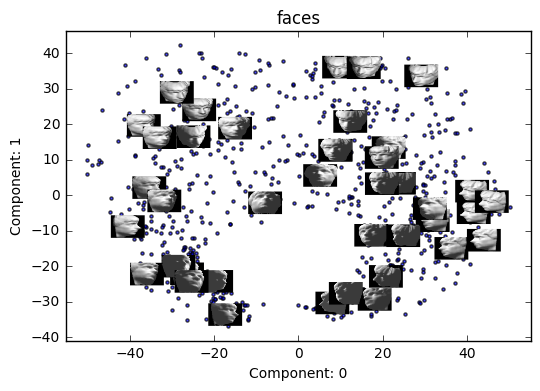

In [40]:
# Plot last 2 components
Plot2D(manifold, 'faces', 0,1, num_to_plot=40)

Again, we can see that along x axis, the plot represent to rotation of facial direction from left to right. Compare with the plot gerated by PCA method, Isomap shows an advantages in capturing several nonlinear features. 

Now, let's do some 3D plots.

In [41]:
def Plot3D1(T, title, x, y, z, num_to_plot=40):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection = '3d')
  ax.set_title(title)
  ax.set_xlabel('Component: {0}'.format(x))
  ax.set_ylabel('Component: {0}'.format(y))
  ax.set_zlabel('Component: {0}'.format(z))
  x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
  y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
  z_size = (max(T[:,z]) - min(T[:,z])) * 0.08
  
  ax.scatter(T[:,x],T[:,y],T[:,z], marker='.', alpha=0.65)


Fof the case of PCA

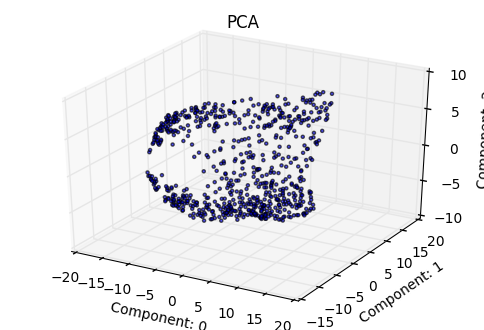

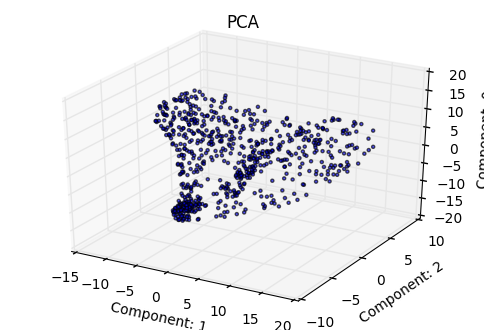

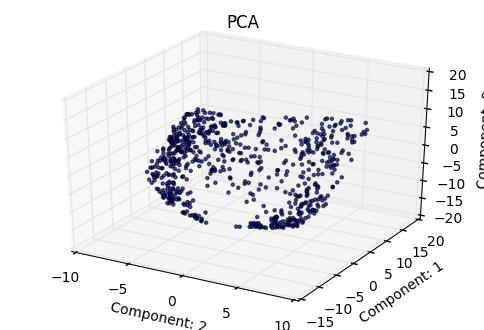

In [42]:
Plot3D1(T, 'PCA', 0, 1, 2, num_to_plot = 45)
Plot3D1(T, 'PCA', 1, 2, 0, num_to_plot = 45)
Plot3D1(T, 'PCA', 2, 1, 0, num_to_plot = 45)

And, for the case of Isomap.

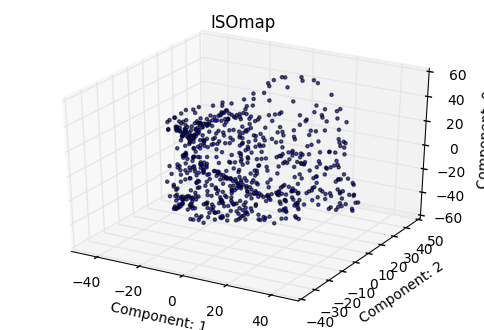

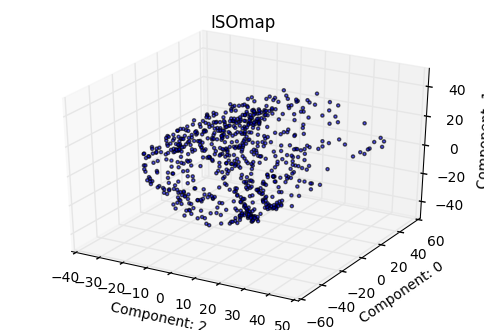

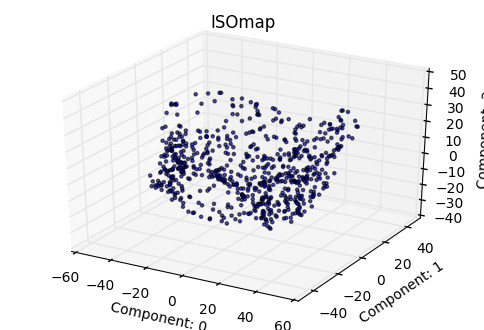

In [45]:
Plot3D1(manifold, 'ISOmap', 1,2,0, num_to_plot = 45)
Plot3D1(manifold, 'ISOmap', 2,0,1, num_to_plot = 45)
Plot3D1(manifold, 'ISOmap', 0,1,2, num_to_plot = 45)

We can see that Isomap 3D plots are more rounded that PCA plots. This might due by the fact of nonlinear features that generate by rotating the face from left to right and from down to up positions.